# Explore here

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv

# pip install spotipy

# load the .env file variables
load_dotenv()

from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

client_id




'724828ce5ceb4fcca2e21b33b864cbb3'

In [2]:
import base64
import requests

# Encode the client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Prepare the token request
token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {client_credentials_base64.decode()}"
}
data = {
    "grant_type": "client_credentials"
}

# Request access token
response = requests.post(token_url, headers=headers, data=data)

# Check if the request was successful
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained!")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)

Access token obtained!


In [3]:
#access_token

In [4]:
# Set the access token in the headers
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Define the endpoint and parameters
search_url = "https://api.spotify.com/v1/search"
params = {
    "q": "Travis Scott",  # Artist name to search for
    "type": "artist",
    "limit": 1
}

# Make the API request to search for the artist
response = requests.get(search_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()
    # print(f"Response Data: {response_data}")
    artist_id = response_data['artists']['items'][0]['id']
    artist_name = response_data['artists']['items'][0]['name']
    print(f"Found artist: {artist_name} (ID: {artist_id})")
else:
    print(f"Failed to search for artist. Status code: {response.status_code}")
    print(response.text)

Found artist: Travis Scott (ID: 0Y5tJX1MQlPlqiwlOH1tJY)


In [5]:
# Define the endpoint for the artist's top tracks
top_tracks_url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
params = {
    "market": "US"  # Specify the market (country)
}

# Make the API request to get top tracks
response = requests.get(top_tracks_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    top_tracks_data = response.json()
    print(f"Top tracks for {artist_name}:")
    for idx, track in enumerate(top_tracks_data['tracks'], start=1):
        # print(f"Track data: {track}")
        track_name = track['name']
        album_name = track['album']['name']
        print(f"{idx}. {track_name} - Album: {album_name}")
else:
    print(f"Failed to get top tracks. Status code: {response.status_code}")
    print(response.text)

Top tracks for Travis Scott:
1. FE!N (feat. Playboi Carti) - Album: UTOPIA
2. goosebumps - Album: Birds In The Trap Sing McKnight
3. HIGHEST IN THE ROOM - Album: HIGHEST IN THE ROOM
4. Type Shit - Album: WE DON'T TRUST YOU
5. BUTTERFLY EFFECT - Album: ASTROWORLD
6. Open Arms (feat. Travis Scott) - Album: SOS
7. I KNOW ? - Album: UTOPIA
8. MY EYES - Album: UTOPIA
9. Trance (with Travis Scott & Young Thug) - Album: HEROES & VILLAINS
10. SICKO MODE - Album: ASTROWORLD


In [6]:
def get_access_token(client_id, client_secret):
    try:
        # Encoding and token request as before
        client_credentials = f"{client_id}:{client_secret}"
        client_credentials_base64 = base64.b64encode(client_credentials.encode())
        token_url = "https://accounts.spotify.com/api/token"
        headers = {
            "Authorization": f"Basic {client_credentials_base64.decode()}"
        }
        data = {
            "grant_type": "client_credentials"
        }
        response = requests.post(token_url, headers=headers, data=data)
        response.raise_for_status()  # Raises an HTTPError for bad status codes
        access_token = response.json()['access_token']
        return access_token
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    return None

# Use the function to get the access token
access_token = get_access_token(client_id, client_secret)
if access_token:
    print("Access token obtained successfully.")
else:
    print("Failed to obtain access token.")

Access token obtained successfully.


In [11]:


top_tracks_url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
params = {
    "market": "US"  
}


response = requests.get(top_tracks_url, headers=headers, params=params)


if response.status_code == 200:
    top_tracks_data = response.json()
    print(f"Top tracks for {artist_name}:")
for idx, track in enumerate(top_tracks_data['tracks'], start=1):
      

    track_name = track['name']
    album_name = track['album']['name']
    popularity = track['popularity']  
    duration_ms = track['duration_ms']  
    
   
    print(f"{idx}. {track_name} - Album: {album_name}, Popularity: {popularity}, Duration: {duration_ms} ms")

else:
    print(f"Failed to get top tracks. Status code: {response.status_code}")
    print(response.text)

   




Top tracks for Travis Scott:
1. FE!N (feat. Playboi Carti) - Album: UTOPIA, Popularity: 89, Duration: 191700 ms
2. goosebumps - Album: Birds In The Trap Sing McKnight, Popularity: 86, Duration: 243836 ms
3. HIGHEST IN THE ROOM - Album: HIGHEST IN THE ROOM, Popularity: 85, Duration: 175720 ms
4. Type Shit - Album: WE DON'T TRUST YOU, Popularity: 85, Duration: 228266 ms
5. BUTTERFLY EFFECT - Album: ASTROWORLD, Popularity: 83, Duration: 190557 ms
6. Open Arms (feat. Travis Scott) - Album: SOS, Popularity: 81, Duration: 239613 ms
7. I KNOW ? - Album: UTOPIA, Popularity: 83, Duration: 211582 ms
8. MY EYES - Album: UTOPIA, Popularity: 83, Duration: 251249 ms
9. Trance (with Travis Scott & Young Thug) - Album: HEROES & VILLAINS, Popularity: 82, Duration: 194786 ms
10. SICKO MODE - Album: ASTROWORLD, Popularity: 81, Duration: 312820 ms
Failed to get top tracks. Status code: 200
{"tracks":[{"album":{"album_type":"album","artists":[{"external_urls":{"spotify":"https://open.spotify.com/artist/0Y5

In [13]:
import pandas as pd


tracks_data = []


for idx, track in enumerate(top_tracks_data['tracks'], start=1):
    track_name = track['name']
    album_name = track['album']['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']
    
   
    tracks_data.append({
        "Track Name": track_name,
        "Album": album_name,
        "Popularity": popularity,
        "Duration (ms)": duration_ms
    })


df_tracks = pd.DataFrame(tracks_data)


df_tracks_sorted = df_tracks.sort_values(by="Popularity", ascending=True)


print("Top 3 Songs by Increasing Popularity:")
print(df_tracks_sorted.head(3))


Top 3 Songs by Increasing Popularity:
                                Track Name              Album  Popularity  \
5           Open Arms (feat. Travis Scott)                SOS          81   
9                               SICKO MODE         ASTROWORLD          81   
8  Trance (with Travis Scott & Young Thug)  HEROES & VILLAINS          82   

   Duration (ms)  
5         239613  
9         312820  
8         194786  


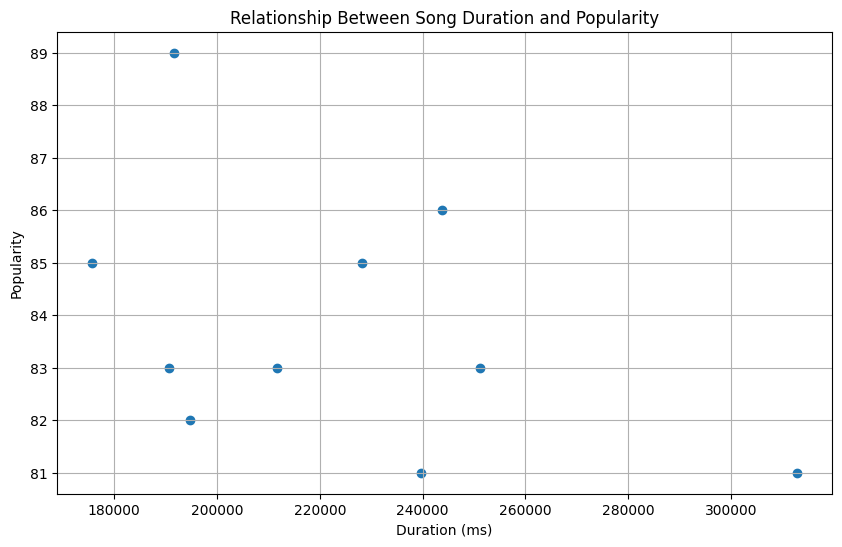

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df_tracks_sorted['Duration (ms)'], df_tracks_sorted['Popularity'])


plt.title("Relationship Between Song Duration and Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.grid(True)


plt.show()



